## Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.


## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

* 16
* 17
* 18
* 19


## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

* 41.45
* 46.45
* 51.45
* 56.45


## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%


## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* 515
* 715


## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 6.99
* 11.99
* 16.99
* 21.99


## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2022). 

What's the RMSE on validation?

* 7.79
* 12.79
* 17.79
* 22.79

## Submit the results

* Submit your results here: https://forms.gle/uYTnWrcsubi2gdGV7
* You can submit your solution multiple times. In this case, only the last submission will be used
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 23 May 2023 (Tuesday), 23:00 CEST (Berlin time). 

After that, the form will be closed.

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Q1:

In [90]:
df= pd.read_parquet(
   '/home/fonsecatiago04/MLOPS-COURSE/data/yellow_tripdata_2022-01.parquet', 
   engine='fastparquet')

print(df.shape[1])

19


Q2:

In [91]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
df['duration']=df.tpep_dropoff_datetime-df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df.duration.std()


46.44530513776499

/home/fonsecatiago04/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

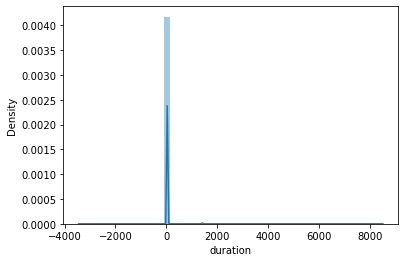

In [92]:
## Plot of the duration
sns.distplot(df.duration)

Q3:

In [93]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9827547930522406

Q4:

In [94]:
df=df[(df.duration >= 1) & (df.duration <= 60)]
categorical = ['PULocationID', 'DOLocationID']
numerical  = ['trip_distance']

In [95]:
df[categorical]=df[categorical].astype(str)
train_dicts = df[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [96]:
# dv.feature_names_

In [97]:
target = 'duration'
y_train = df[target].values
y_train
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = lr.predict(X_train)

/home/fonsecatiago04/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fonsecatiago04/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


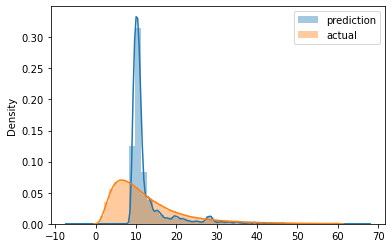

In [99]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()

Q5:

In [100]:
mean_squared_error(y_train,y_pred,squared = False)

6.986321904243403

Q6:

In [101]:
df_val = pd.read_parquet(
   '/home/fonsecatiago04/MLOPS-COURSE/data/yellow_tripdata_2022-02.parquet', 
   engine='fastparquet')

In [104]:
df_val.tpep_pickup_datetime = pd.to_datetime(df_val.tpep_pickup_datetime)
df_val.tpep_dropoff_datetime = pd.to_datetime(df_val.tpep_dropoff_datetime)
df_val['duration']=df_val.tpep_dropoff_datetime-df_val.tpep_pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

df_val=df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]
categorical = ['PULocationID', 'DOLocationID']
numerical  = ['trip_distance']

df_val[categorical]=df_val[categorical].astype(str)


val_dicts = df_val[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer()
X_val = dv.fit_transform(val_dicts)

In [107]:
df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']


train_dicts = df[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [108]:
target = 'duration'
y_train = df[target].values
y_val = df_val[target].values

In [109]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

5.414824520221955